# BASEBALL MATCH PREDICTION PROJECT

Name: Vaibhav Tayade
contact: 8087970061
Email id: vaibhav_t29@rediffmail.com

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# IMPORTING DATASET:

In [2]:
# Importing dataset and creating dataframe:
df = pd.read_csv('baseball_data.csv')

In [3]:
# rearraging dataframe columns:
df = df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E', 'W']]

Dataframe abbreviations and their full forms:
    
    
R = Runs,
AB = At Bats,
H = Hits,
2B = Doubles,
3B = Triples,
HR = Homeruns,
BB = Walks,
SO = Strikeouts,
SB = Stolen Bases,
RA = Runs Allowed,
ER = Earned Runs,
ERA = Earned Run Average (ERA),
SHO = Shutouts,
SV = Saves,
CG = Complete Games
E = Errors
W = Win

In [4]:
# checking few samples of dataframe:
df.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


In [5]:
# checking details of the dataframe:
df.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


Observation:


From the above details, we can say that there are few columns where Mean is higher than Median, so we can say that there are presence of Outliers in the dataset.


NOTE: As our Target column i.e. W is having continous data in nature, we know its a Regression problem.

In [6]:
# checking null values:
df.isnull().sum()

R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
W      0
dtype: int64

Observation:    There are no null values present in any dataset

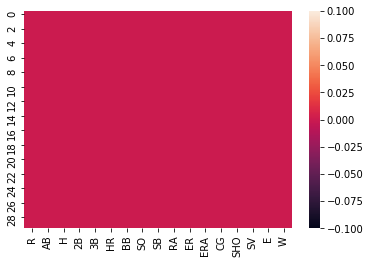

In [7]:
# checking null values using heatmap
sns.heatmap(df.isnull())

Observation:
    
    There are no NULL values present in this dataset.

# UNIVARIATE ANALYSIS:

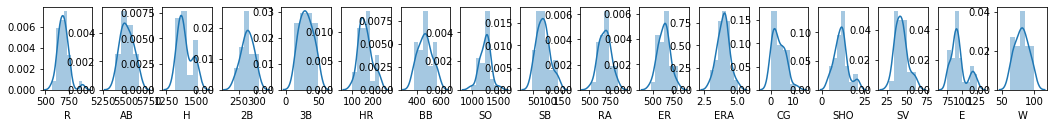

In [8]:
# checking data distribution in every column with the help of distplot

collist = df.columns.values
ncol = 17
nrows = 10


plt.figure(figsize=(18, 18))

for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.distplot(df[collist[i]])

Observations:
We can say that from the above dist plot, that there are skewness present in columns like, R i.e. Runs, H i.e. Hits, HR i.e. Homeruns, CG i.e. Complete Games, SHO i.e. Shutouts, SV i.e. Saves and E i.e. Errors.

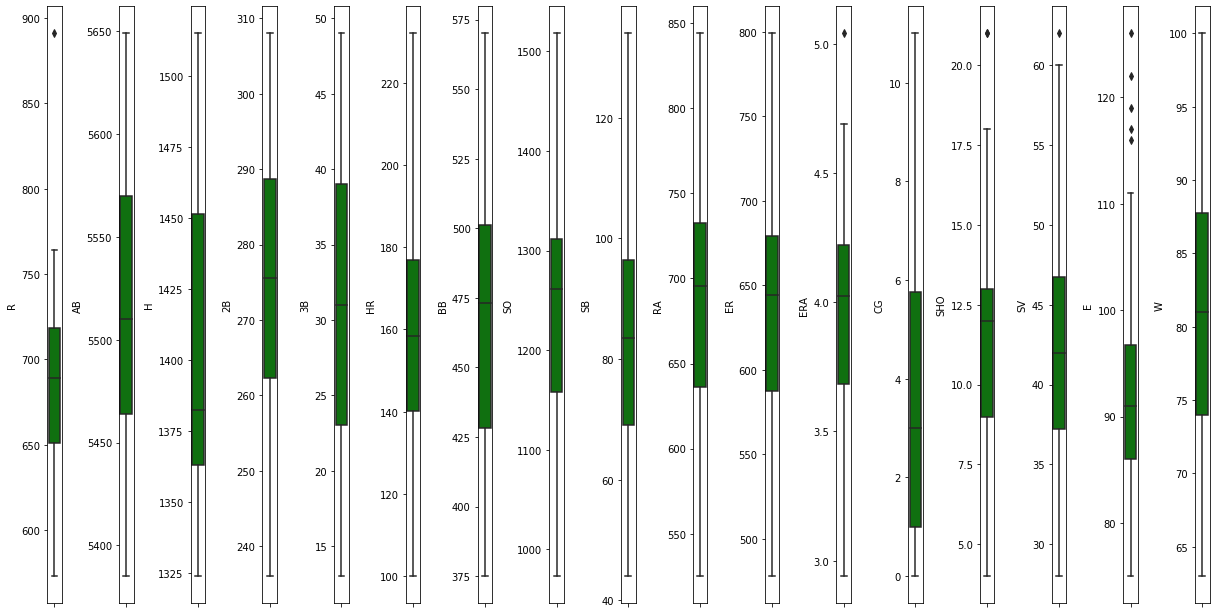

In [9]:
# checking outliers presence in individual columns using boxplots.

column_list = df.columns.values
ncol=17
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[column_list[i]],color='green',orient='v')
    plt.tight_layout()

Observations:

We can say that there are outliers present in the columns like 'R' i.e. Runs, 'ERA' i.e. Earned Run Average, 'SHO' i.e. Shutouts, 'SV' i.e. Saves and  'E' i.e. Errors.

# CHECKING CORRELATION MATRIX:

In [10]:
# checking correlation of the dataset.
dfcor = df.corr()
dfcor

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


UNDERSTANDING CORRELATION MATRIX WITH THE HELP OF HEATMAP:

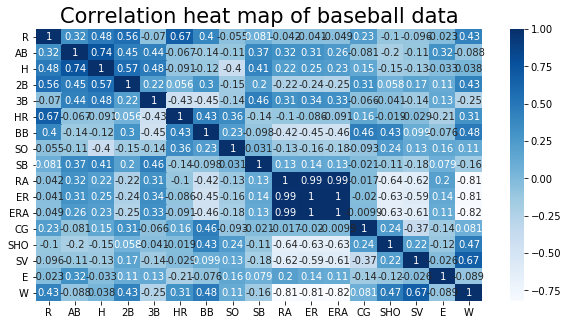

In [11]:
plt.figure(figsize=(10,5))
plt.title('Correlation heat map of baseball data', fontsize = 21)

sns.heatmap(dfcor,cmap='Blues', annot=True)

Observation:

From the above correlation heatmap plot, we can say that 'ERA' i.e. Earned run average column is most negatively correlated with 'W' i.e. Win column.

From the above correlation heatmap plot, we can say that 'SV' i.e. Saves column is most positively correlated with 'W' i.e. Win column.
Rest are the columns are moderately correlated with 'W' i.e. Win column.

In [12]:
# checking amount of skewness in every column.
df.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

Observation:
    
1) skewness can be easily seen in the columns like R, H, HR, CG, SHO, SV and E.

2) Skewness is maximum in R i.e. Runs columns.

3) Skewness is minimun in RA i.e. Runs Allowed.

# REMOVING OUTLIERS:

In [13]:
#Removing Outliers:
z=np.abs(zscore(df))
z

array([[6.19077968e-01, 8.47731264e-01, 1.66368512e+00, 1.42017307e+00,
        1.04119304e+00, 7.87298598e-01, 1.53490242e+00, 2.69762957e+00,
        9.13883291e-01, 6.66233927e-01, 5.05110079e-01, 5.06955186e-01,
        5.39806195e-01, 8.14628593e-01, 1.67160651e+00, 4.61469635e-01,
        1.36540860e+00],
       [1.34431656e-01, 7.11093535e-01, 9.70680764e-01, 1.27403389e-01,
        1.23580856e+00, 2.43966683e-01, 5.36591904e-01, 1.54878442e-01,
        6.01825582e-01, 1.65970766e-01, 2.48929848e-01, 2.54597523e-01,
        5.39806195e-01, 1.72800005e-01, 2.49879323e-01, 6.07196888e-01,
        1.97838300e-01],
       [3.32905860e-01, 1.11523330e+00, 1.51891367e-01, 1.58879521e+00,
        2.23807850e-01, 7.23377196e-01, 1.13914361e+00, 8.93981893e-01,
        1.11449182e-01, 6.80339091e-01, 7.51623132e-01, 6.41346840e-01,
        2.77264091e+00, 3.20914294e-01, 6.54856158e-01, 1.11724227e+00,
        3.24325082e-03],
       [1.14641931e+00, 2.41521620e-01, 4.01088140e-01, 8.281

In [14]:
threshold = 3
print(np.where(z>threshold))

(array([5], dtype=int64), array([0], dtype=int64))


In [15]:
#creating new dataset without outliers and skewness
df_new = df[(z<3).all(axis=1)]
df_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93,87
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77,81
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95,80
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97,78
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119,88


In [16]:
# checking skewness of new dataset.
df_new.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
W      0.119013
dtype: float64

Observation:
    We can say that skewness of most of the column is treated well, still few columns has skewness because it's their internal property.

# CHECKING DATALOSS:

In [17]:
# checking loss of the data after removing skewness.

print(((df.shape[0]-df_new.shape[0])/df.shape[0]*100))

3.3333333333333335


Observation:
    After removing skewness, we can see that there is almost 3.3% loss of data, which is very much in limits.

In [18]:
# creating dataframe for algorithm modeling.

x = df_new.iloc[:,0:16]
y = df_new.iloc[:,-1]

In [19]:
x.shape


(29, 16)

In [20]:
y.shape

(29,)

In [21]:
x.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# SCALING DATASET:

In [22]:
sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
X= pd.DataFrame(x, columns = columnslist)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898


# Creating Train Test Dataset:

In [23]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23, 16)
(23,)
(6, 16)
(6,)


# Linear Regression Method:

In [24]:
LR_1 = LinearRegression()
LR_1.fit(x_train, y_train)

LinearRegression()

In [25]:
LR_1.coef_

array([  3.41675687,  -7.27028845,   4.39320806,   0.76573487,
         1.26575754,   1.37389773,  -1.59815281,  -1.26795766,
        -2.59814401,  -1.72958237,  76.63924094, -83.81797835,
        -0.48269173,  -1.3156615 ,  -0.3613038 ,  -0.20280294])

In [26]:
LR_1.intercept_

79.60335000772884

In [27]:
LR_1.score(x_train, y_train)

0.9669863192160294

Accuracy of the dataset is 96.69 %

In [28]:
predicted_x_values = LR_1.predict(x_test)
print('Predicted values: ', predicted_x_values)

Predicted values:  [74.44532015 80.38120321 79.05585402 58.71294186 80.20180823 79.70002275]


In [29]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(LR_1, X, y, cv=5).mean())

0.03762866049631375


CV Score of Linear regression model is 3%.

In [30]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, predicted_x_values))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, predicted_x_values))

print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, predicted_x_values)))

ERRORS:
MEAN ABSOLUTE ERROR:  6.484802428855585
MEAN SQUARED ERROR:  71.35564581017354
ROOT MEAN SQUARED ERROR:  8.44722710776581


In [31]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, predicted_x_values))

r2 Score of Linear Regression model: 

0.25928395352761024


# REGULARIZATION METHODS:

Lasso Regularization method:

In [32]:
LS = Lasso(alpha = 0.01)
LS.fit(x_train, y_train)
LS.score(x_train, y_train)

0.9562936456805592

Checking over fitting of the model using cross validation score:

In [33]:
print(cross_val_score(LS, X, y, cv=5).mean())

0.30962888750184064


Ridge Regularization method:

In [34]:
RD = Ridge(alpha= 0.01)

RD.fit(x_train, y_train)
RD.score(x_train, y_train)

0.9588910675506408

Checking over fitting of the model using cross validation score:

In [35]:
print(cross_val_score(RD, X, y, cv=5).mean())

0.2775420416974962


# ELASTIC NET REGULARIZATION METHOD:

In [36]:
# elastic net is a combination of both lasso and ridge methods.
ENR= ElasticNet(alpha= 0.01)

ENR.fit(x_train, y_train)
enrpred=ENR.predict(x_test)
print(ENR.score(x_train, y_train))
ENR.coef_

0.9461396060830952


array([ 4.01862567, -0.25429723,  0.78834514, -0.82454123,  0.09525605,
       -0.37050551, -1.06595011, -0.36935296, -1.09924599,  4.6181324 ,
       -1.88480232, -8.53042727,  1.21391729,  0.467971  ,  4.08834964,
       -0.76209627])

In [37]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  3.4392465114784656
MEAN SQUARED ERROR:  19.81795815395358
ROOT MEAN SQUARED ERROR:  4.451736532405481


Checking over fitting of the model using cross validation score:

In [38]:
print(cross_val_score(ENR, X, y, cv=5).mean())

0.32977426108994373


# SUPPORT VECTOR REGRESSOR METHOD:

In [39]:

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.9161411626297148

kernel : poly
0.4546401550946497

kernel : rbf
0.2648721948929845


As Linear kernel of support vector model is having highest accuracy we can consider that one. 

In [40]:
# support vector linear model is best model among all kernel paramters as it gave higher accuracy:

sv_lr = SVR('linear')
sv_lr.fit(x_train, y_train)
print(sv_lr.score(x_train, y_train))

0.9161411626297148


In [41]:
# predicting x_test dataset
svpred=sv_lr.predict(x_test)

Checking over fitting of the model using cross validation score:

In [42]:
# checking cross validation score of support vector regressor linear model:

print(cross_val_score(sv_lr, X, y, cv=5).mean())

0.3079577896379637


In [43]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  4.076126137152542
MEAN SQUARED ERROR:  28.495001034036353
ROOT MEAN SQUARED ERROR:  5.338070909423774


In [44]:
# checking r2 score error of support vector regressor linear model

print(r2_score(y_test, svpred))

0.7042041415151936


# DECISION TREE REGRESSION METHOD:

In [45]:
# checking decision tree regressor method.

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

1.0


In [46]:
y_pred = dtr.predict(x_test)
y_pred

array([80., 98., 64., 64., 68., 68.])

In [47]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  8.666666666666666
MEAN SQUARED ERROR:  115.0
ROOT MEAN SQUARED ERROR:  10.723805294763608


Checking over fitting of the model using cross validation score:

In [48]:
# checking cross validation score of decision tree regressor model
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(dtr, X, y, cv=cv1).mean())

-1.6217361857249717


# RANDOM FOREST REGRESION METHOD:

In [49]:
# Using Random forest regressor algorithm.

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [50]:
print(rf.score(x_train, y_train))

0.9518948853709844


In [51]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  5.788333333333331
MEAN SQUARED ERROR:  46.33814999999998
ROOT MEAN SQUARED ERROR:  6.807213086131503


Checking over fitting of the model using cross validation score:

In [52]:
# checking cross validation score of random forest regressor model.
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, X, y, cv=cv1).mean())

-1.8643980460156837


# ADA BOOST REGRESSION METHOD:

In [53]:
# Using ada boost regressor algorithm.

adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.9875470283845702


In [54]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  6.018518518518519
MEAN SQUARED ERROR:  40.631687242798364
ROOT MEAN SQUARED ERROR:  6.37429896088961


Checking over fitting of the model using cross validation score:

In [55]:
# checking cross validation score of ada boost regressor model.
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, X, y, cv=cv1).mean())

0.06471728701104891


# OBSERVATION:

OBSERVATION:
    
    By checking the accuracy score of all the models with their cross validation score we found out that support vector classifier model is our final model having high accuracy with least overfitting.

In [56]:
# checking parameters used.
sv_lr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# FINDING BEST PARAMETER USING GRID SEARCH CV:


In [79]:


parameters = {'kernel' : ['linear','rbf'],
              'gamma' : ['scale','auto'],
              }


In [81]:
gs_svr = GridSearchCV(SVR(), parameters, cv = 5)

In [82]:
gs_svr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [83]:
gs_svr.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

Observation:
    Our best parameters for support vector algorithm is gamma = scale, kernel = linear.

# FINAL MODEL MAKING:

In [84]:
# using best parameters for tuning the model.

sv_lr_f = SVR(kernel = 'linear', gamma = 'scale')
sv_lr_f.fit(x_train, y_train)





SVR(kernel='linear')

In [85]:
print(sv_lr_f.score(x_train, y_train))

0.9161411626297148


Observation: After hyper tuning parameters technique also, we could not improve the accuracy of the model, which turned out to be same.

In [86]:
svpred_f=sv_lr_f.predict(x_test)

# CHECKING ERRORS OF THE FINAL MODEL:

In [87]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svpred_f))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svpred_f))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svpred_f)))


ERRORS:
MEAN ABSOLUTE ERROR:  4.076126137152542
MEAN SQUARED ERROR:  28.495001034036353
ROOT MEAN SQUARED ERROR:  5.338070909423774


In [88]:
print(r2_score(y_test, svpred_f))

0.7042041415151936


Checking over fitting of the model using cross validation score:

In [89]:
print(cross_val_score(sv_lr, X, y, cv=5).mean())

0.3079577896379637


# SAVING THE DATASET:

In [67]:
import joblib
joblib.dump(sv_lr_f, 'Vaibhav_baseball_project_model.pkl')

['Vaibhav_baseball_project_model.pkl']

# RELOADING THE DATASET:

In [68]:
#Reloading the model and predicting the dataset.
SVR_Vaibhav_baseball_project_model = joblib.load('Vaibhav_baseball_project_model.pkl')
SVR_Vaibhav_baseball_project_model.predict(x_train)

array([ 71.10038596,  94.89992941,  78.92840409,  73.05186785,
        92.58743969,  83.15186195,  72.01449395,  80.93582269,
        70.03603463,  86.90001021,  81.10047786,  89.50852159,
        74.01234872,  62.89959515,  84.98655518,  66.06842942,
        68.09992902,  83.09949105,  89.38917666,  83.74326976,
       100.10033395,  90.09984653,  82.20136044])

# CONCLUSION:

CONCLUSION:
    
    Our final model is having accuracy of 91.61 % with less overfitting.

# THANK YOU